## Dependencies and Data

As always here we import all the dependencies and data 

In [10]:
import pandas as pd
import numpy as np

dataset=pd.read_csv('weatherHistory-data.csv')

print(dataset.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

Since in this code we are dealing with multivariate linear regression we need multiple variables. Now we will consider Pressure values too along with temperature to predict humidity.

In [11]:
data=dataset[["Apparent Temperature (C)","Pressure (millibars)"]]
target=dataset[["Humidity"]]
print(data.head())
print(target.head())

   Apparent Temperature (C)  Pressure (millibars)
0                  7.388889               1015.13
1                  7.227778               1015.63
2                  9.377778               1015.94
3                  5.944444               1016.41
4                  6.977778               1016.51
   Humidity
0      0.89
1      0.86
2      0.89
3      0.83
4      0.83


## Model and Fitting

We split the data for training and testing 

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.33,random_state=4)

print(x_train.head())
print(y_train.head())

       Apparent Temperature (C)  Pressure (millibars)
95679                  5.900000               1015.97
70819                 15.088889               1018.50
6028                  13.483333               1016.11
47353                -10.905556               1025.06
25991                 11.627778               1016.84
       Humidity
95679      0.88
70819      0.66
6028       0.89
47353      0.96
25991      0.88


We fit the training values into the model which is logistic regresion. The x_train and x_test will have 2 columns since the data x is dealing with temperature as well as pressure.
We also find out the slope value,intercept value and all the metrics scores.

In [13]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(x_train,y_train)

pred=model.predict(x_test)
print(pred)

print("The slope of  the line is : ",model.coef_)
print("The intercepts of the line is : ",model.intercept_)

from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error is : ",mean_squared_error(y_test,pred))
print("r2 score is : ",r2_score(y_test,pred))

[[0.9241307 ]
 [0.75679777]
 [0.7578168 ]
 ...
 [0.62085097]
 [0.63422771]
 [0.71335252]]
The slope of  the line is :  [[-1.10741764e-02  7.74305381e-06]]
The intercepts of the line is :  [0.84704779]
Mean squared error is :  0.024100124784505433
r2 score is :  0.3597650718642639


Changing x_test values as array values since the plotting function uses only array values.

In [5]:
x_test=x_test.values

## Visualization

First we find the relationship between temperature and humidity alone. 

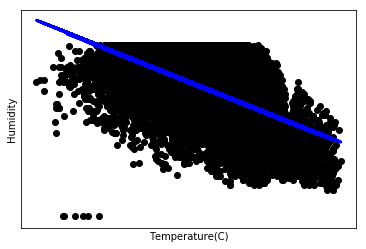

In [12]:
import matplotlib.pyplot as plt


plt.scatter(x_test[:,0], y_test,  color='black')
plt.plot(x_test[:,0],pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.ylabel("Humidity")
plt.xlabel("Apparent Temperature(C)")

plt.show()

Here we get to know the inverse variation of temperature and humidity as seen in the single variate case. 
Next we try to find the relationship between pressure and humidity.

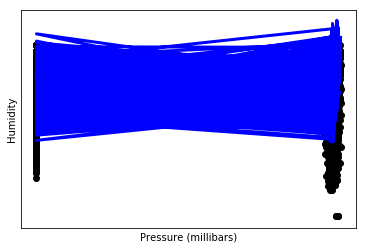

In [13]:
plt.scatter(x_test[:,1], y_test,  color='black')
plt.plot(x_test[:,1],pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.ylabel("Humidity")
plt.xlabel("Pressure (millibars)")

plt.show()

Here we see the most dirtiest relationship of all time..Hence we can conclude that there is not much relationship between pressure and humidity.
The task for you is to get another variable from the dataset or even try with some other data and try to find relationship between the variables.

In [18]:
from sklearn.preprocessing import StandardScaler

x_scaled=StandardScaler()
x_train = x_scaled.fit_transform(x_train)
humidity_scaled = StandardScaler()
humidity_train = humidity_scaled.fit_transform(y_train)
x_test_scaled= StandardScaler()
x_test=x_test_scaled.fit_transform(x_test)
humidity_test_scaled=StandardScaler()
humidity_test=humidity_test_scaled.fit_transform(y_test)

## Load data into Support Vector Regression model

Here again we load the data to SVR model and see how different it performs to the multivariate data.

In [19]:
from sklearn.svm import SVR

model1=SVR(kernel="linear")

model1.fit(x_train,humidity_train.ravel())
pred1=model1.predict(x_test)

print(pred1)

[ 1.0661142   0.16348472  0.16898778 ... -0.5698177  -0.49768266
 -0.07084706]


In [20]:
from sklearn.metrics import mean_squared_error,r2_score

print("Mean squared error is : ",mean_squared_error(humidity_test,pred1))
print("r2 score is : ",r2_score(humidity_test,pred1))

Mean squared error is :  0.6441258213448454
r2 score is :  0.3558741786551546


As we can see the mean square error is more in SVR than Linear regression for this multivariate data. There is no much sound change in the r-squared score.